In [ ]:
# Import the libraries we'll use below.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

import tensorflow as tf
from tensorflow import keras

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [ ]:
def plot_decision_boundary(X, Y, model, steps=100, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.3)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, s=3)
    
    return fig, ax

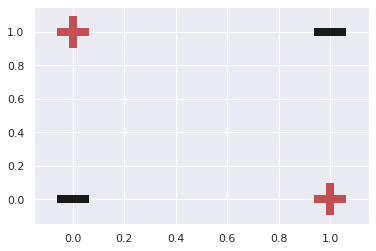

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 0])

pos_X = X[Y==1]
neg_X = X[Y==0]
plt.scatter(x=pos_X[:,0], y=pos_X[:,1], marker='+', c='r', s=1000, linewidth=8)
plt.scatter(x=neg_X[:,0], y=neg_X[:,1], marker='_', c='k', s=1000, linewidth=8)
plt.xlim(-0.15, 1.15)
plt.ylim(-0.15, 1.15)
plt.show()

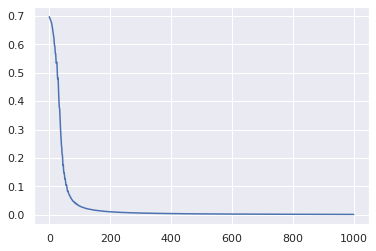

In [ ]:
def build_xor_model(hidden_layer_sizes=[], seed=1):
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(seed)

  model = keras.Sequential()
  for hidden_layer_size in hidden_layer_sizes:
    model.add(keras.layers.Dense(units=hidden_layer_size,
                                 activation='relu'))
  model.add(keras.layers.Dense(units=1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.SGD(learning_rate=1))
  return model

xor_model = build_xor_model(hidden_layer_sizes=[2], seed=1)
history = xor_model.fit(x = X, y = Y, epochs=1000, batch_size=4, verbose=0)
losses = history.history['loss']
plt.plot(losses)
plt.show()

In [ ]:
print('layer 1:')
#w, b = xor_model.layers[0].get_weights()
#w, b = np.array([[-3,3],[3,-3]]), np.array([0,0])
w, b = np.array([[-1,1],[1.1,-1]]), np.array([0,0])
#print('w:\n', w)
#print('b:\n', b)
print(np.dot(X,w.T)+b)
output = np.maximum(0,np.dot(X,w.T)+b)
print(output)

print('layer 2:')
#w, b = xor_model.layers[1].get_weights()
#w, b = np.array([[4],[4]]),np.array([-4])
w, b = np.array([[1],[1]]),np.array([-1])
#print('w:\n', w)
#print('b:\n', b)
output = sigmoid(np.dot(output,w)+b).squeeze()
print('output:', output)

def logloss(yhat, y):
  values = -(y * np.log(yhat)) - ((1-y) * np.log(1-yhat))
  return values.mean()

print('loss:', logloss(output, Y))

layer 1:
[[ 0.   0. ]
 [ 1.  -1. ]
 [-1.   1.1]
 [ 0.   0.1]]
[[0.  0. ]
 [1.  0. ]
 [0.  1.1]
 [0.  0.1]]
layer 2:
output: [0.26894142 0.5        0.52497919 0.2890505 ]
loss: 0.4979898507209567


\begin{align}
\begin{bmatrix}
x_0 & x_1
\end{bmatrix}
\begin{bmatrix}
-3 & 3\\
3 & -3
\end{bmatrix} +
\begin{bmatrix}
0 & 0
\end{bmatrix}
\end{align}

(2020,)


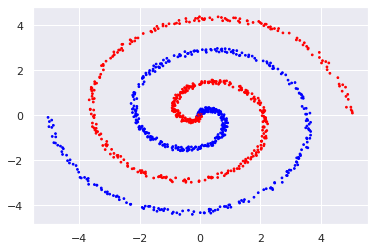

[-0.45410761  1.15365389] 1


In [ ]:
def generate_spiral_data(num_train, num_test):
    np.random.seed(1)
    num = num_train + num_test
    X = []
    
    # The delta values correspond to different offsets for the 2 classes.
    for delta in [0, np.pi]:
        for i in range(num):
            r = 1.0 * i / num * 5
            t = 1.75 * i / num * 2 * np.pi + delta
            x0 = r * np.sin(t) + (2 * np.random.rand() - 1) * 0.1
            x1 = r * np.cos(t) + (2 * np.random.rand() - 1) * 0.1
            X.append([x0, x1])
        
    X = np.array(X)
    Y = np.concatenate([np.zeros(num), np.ones(num)]).astype(int)
    print(Y.shape)

    shuf_idx = np.random.permutation(len(Y))
    X = X[shuf_idx]
    Y = Y[shuf_idx]

    return X[:num_train], Y[:num_train], X[num_train:], Y[num_train:]

X_train, Y_train, X_test, Y_test = generate_spiral_data(1000, 10)
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap='bwr', s=3)
plt.show()

print(X_train[111], Y_train[111])

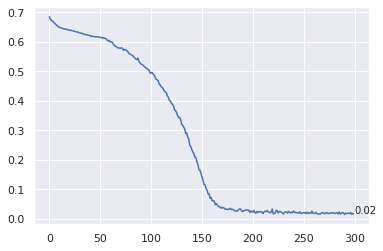

In [ ]:
def build_spiral_model(hidden_layer_sizes=[], seed=0):
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(seed)

  model = keras.Sequential()
  for hidden_layer_size in hidden_layer_sizes:
    model.add(keras.layers.Dense(units=hidden_layer_size,
                                 activation='relu'))
  model.add(keras.layers.Dense(units=1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.SGD(learning_rate=.03))
  return model

spiral_model = build_spiral_model(hidden_layer_sizes=[8,8,4,4])
history = spiral_model.fit(x = X_train, y = Y_train, epochs=300, batch_size=20, verbose=0,)
losses = history.history['loss']
plt.plot(losses)
label = '{:.2f}'.format(losses[-1])
plt.annotate(label, (len(losses), losses[-1]))
plt.show()

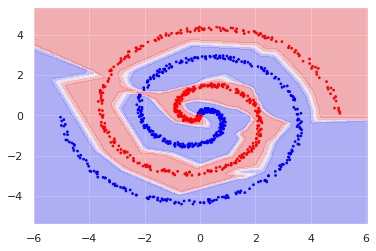

In [ ]:
plot_decision_boundary(X_train, Y_train, spiral_model, cmap='bwr')
plt.show()

\begin{align}
J = (\hat{y}-y)^2 \\
\frac{\partial J}{\partial b_3} \\
\frac{\partial J}{\partial w^1_{21}} \\
\frac{\partial J}{\partial b_1} \\
h(x) = f(g(x)) \\
h'(x) = f'(g(x))g'(x) \\
a_1 &= g(x) = w_0x \\
a_2 &= f(g(x)) = w_1a_1 \\
\frac{\partial}{\partial x} f(g(x)) = \frac{\partial f}{\partial g} \frac{\partial g}{\partial x} \\
\end{align}

\begin{align}
\frac{\partial J}{\partial w_1} = x(\hat{a}_2 - a_2)\\
\frac{\partial J}{\partial w_0} = \frac{\partial J}{\partial w_1} \frac{\partial w_1}{\partial w_0}\\
\end{align}

\begin{align}
\sigma(x) = \frac{1}{1+e^{-x}} \\
\textrm{tanh(x)} = 2\sigma(2x)-1 \\
\textrm{relu(x)} = \max(0,x)
\end{align}